# Script: 3 - preprocessing plan execution
<h4><span style="color:blue">Juan José Hoyos Urcué</span></h4>

## Dataset and python libraries upload

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import util_prep as util
import random
from sklearn.preprocessing import MinMaxScaler

file_name = "cleaned_renamed.xlsx"
df = pd.read_excel(file_name, na_values = ["999.0","888.0","999","888"])

In [2]:
def show_miss():
    columns_na = df.columns[df.isna().any()].to_list()
    by_col = list()

    for col in columns_na:
        info = (col,df[col].isna().sum())
        by_col.append(info)
    return pd.DataFrame(by_col, columns = ["Variable","Number of NaN values"]).style.hide_index()
show_miss()

Variable,Number of NaN values
glucantime_dosage,2
cure_or_fail,5


### Eliminate non-useful records based on the target variable (Nan, excluded patients, loss patients tracking and non-Glucantime patients treated )

In [3]:
df = df[df["cure_or_fail"].notna()] # Delete rowswith Nan in target variable

# Delete excluded patients (labeled as 3)
df = df[df["cure_or_fail"] != 3]

# Delete lost follow up patients (labeled as 2)
df = df[df["cure_or_fail"] != 2]

In [4]:
# delete patients with no glucantime treatment (different of 1 )
df = df[df["prescribed_medication"] == 1]
del df['prescribed_medication'] # delete column, as all are now glucantime patients
df
show_miss() # with this can be observed that those who did not have glucantime dosage where patients with other treatment

Variable,Number of NaN values


### Class Distribution - Target Variable 

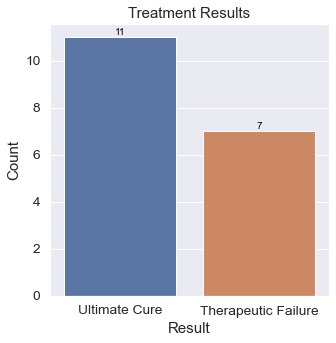

In [5]:
labels = ["Ultimate Cure","Therapeutic Failure"]
values = [df["cure_or_fail"].value_counts()[i] for i in range(len(labels))]
target_data = pd.DataFrame(zip(labels,values), columns = ["Result", "Count"])
util.plot_class_distr(target_data)

### Transform infection department  into numerical scale.

In [6]:
pd.DataFrame(df["infection_department"].value_counts())

,infection_department
Narino,14
Cauca,3
Tolima,1


In [7]:
df["infection_department"] = pd.factorize(df["infection_department"])[0]
pd.DataFrame(df["infection_department"].value_counts())

,infection_department
0,14
2,3
1,1


### Delete variables by correlation
### before deletion

<AxesSubplot:>

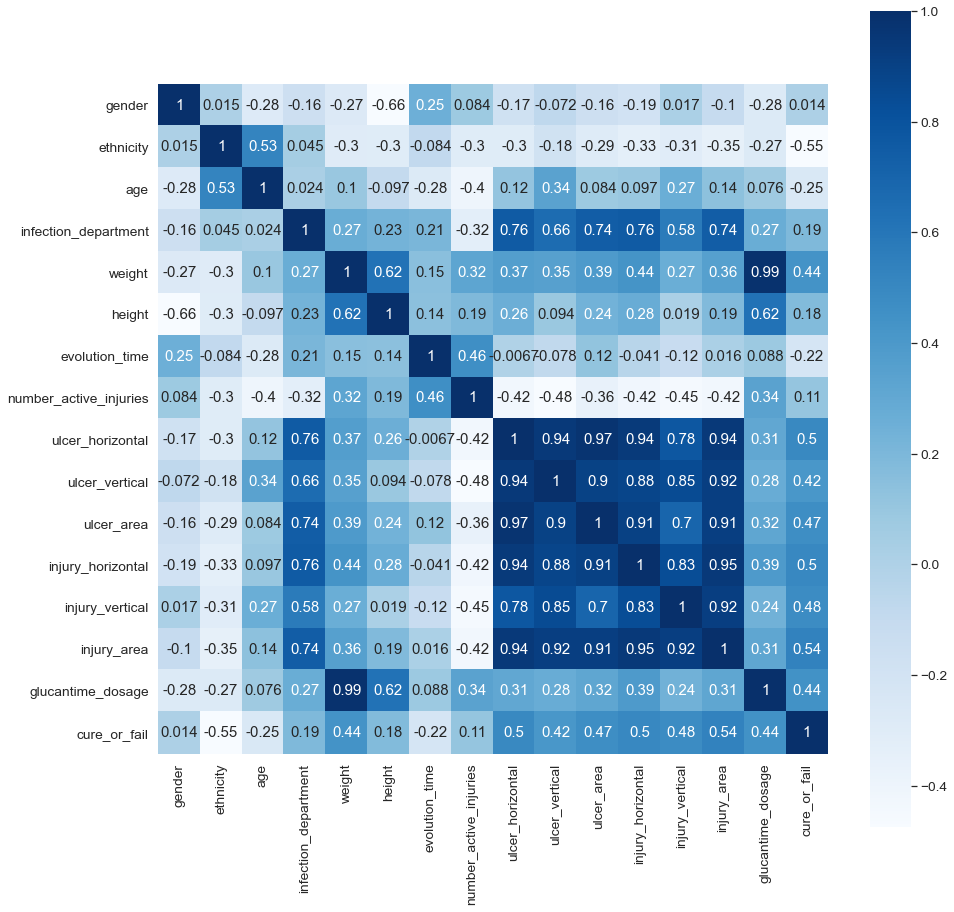

In [8]:
size = 15
plt.figure(figsize = (size,size))
sns.heatmap(df.corr(), square = True, annot=True, cmap = "Blues", robust = True)

In [9]:
# deletion process

to_delete = ["ulcer_horizontal",
            "ulcer_vertical",
            "injury_horizontal",
            "injury_vertical",
            "weight",
            "injury_area"]

df = util.clean_by_correlation(df, to_delete)

### after deletion

<AxesSubplot:>

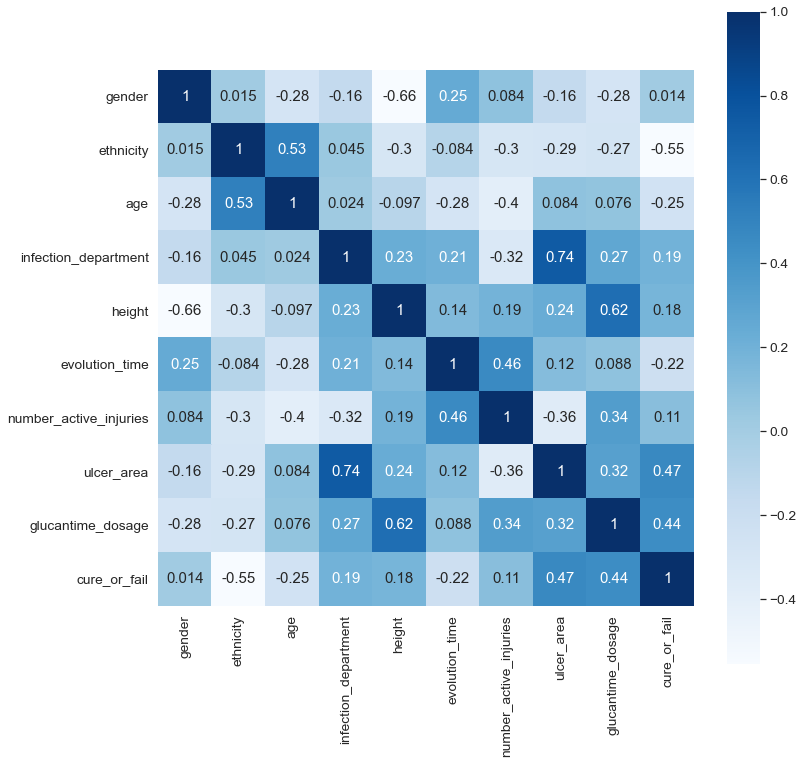

In [10]:
size = 12
plt.figure(figsize = (size,size))
sns.heatmap(df.corr(), square = True, annot=True, cmap = "Blues", robust = True)

## Normalize dataset

### statistical description before normalization

In [11]:
df.describe()

,gender,ethnicity,age,infection_department,height,evolution_time,number_active_injuries,ulcer_area,glucantime_dosage,cure_or_fail
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.277778,1.777778,29.333333,0.388889,165.611111,7.277778,2.722222,1054.527778,16.527778,0.388889
std,0.460889,0.942809,8.471405,0.777544,9.696202,5.889228,2.108960,2234.458714,2.592252,0.501631
min,1.000000,1.000000,18.000000,0.000000,150.000000,2.000000,1.000000,0.000000,13.000000,0.000000
25%,1.000000,1.000000,22.750000,0.000000,158.250000,3.250000,1.000000,53.200000,14.000000,0.000000
50%,1.000000,1.000000,28.000000,0.000000,164.500000,4.000000,2.500000,198.800000,16.250000,0.000000
75%,1.750000,3.000000,34.750000,0.000000,173.500000,8.000000,3.000000,538.850000,19.000000,1.000000
max,2.000000,3.000000,51.000000,2.000000,183.000000,21.000000,8.000000,8669.700000,20.000000,1.000000


In [12]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

### statistical description after normalization

In [13]:
df.describe()

,gender,ethnicity,age,infection_department,height,evolution_time,number_active_injuries,ulcer_area,glucantime_dosage,cure_or_fail
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.277778,0.388889,0.343434,0.194444,0.473064,0.277778,0.246032,0.121634,0.503968,0.388889
std,0.460889,0.471405,0.256709,0.388772,0.293824,0.309959,0.301280,0.257732,0.370322,0.501631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.143939,0.000000,0.250000,0.065789,0.000000,0.006136,0.142857,0.000000
50%,0.000000,0.000000,0.303030,0.000000,0.439394,0.105263,0.214286,0.022930,0.464286,0.000000
75%,0.750000,1.000000,0.507576,0.000000,0.712121,0.315789,0.285714,0.062153,0.857143,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
print("____________________________________________________________")
print("Columns:")
print("____________________________________________________________")
for e in df.columns.to_list():
    print(e)
print("____________________________________________________________")
print("The pre-processed dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))
print("____________________________________________________________")

____________________________________________________________
Columns:
____________________________________________________________
gender
ethnicity
age
infection_department
height
evolution_time
number_active_injuries
ulcer_area
glucantime_dosage
cure_or_fail
____________________________________________________________
The pre-processed dataset has 18 rows and 10 columns
____________________________________________________________


## Save preprocessed dataset

In [15]:
df.to_excel("preprocesado.xlsx", index = False)